In [1]:
import pandas as pd
import numpy as np
import os
from io import StringIO
import re
import csv

from tabulate import tabulate


import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns

from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import plot_partial_dependence

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 9]

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 400)

os.getcwd()

'/Users/lubagloukhov/Documents/Consulting/PiqueSolutions/JavaSE_202007/scripts'

In [3]:
mod_df = pd.read_csv('../data/output/mod_df.csv')  
catg_dummy_list = open('../data/output/catg_dummy_list.csv').read().splitlines()
cont_dummy_list = open('../data/output/cont_dummy_list.csv').read().splitlines()
dummy0_dummy_list = open('../data/output/dummy0_dummy_list.csv').read().splitlines()
exlc_dummy_list = open('../data/output/exlc_dummy_list.csv').read().splitlines()
map_df = pd.read_csv('../data/output/map_df.csv')

In [4]:

y0_list = ['Sat_Org_EclipseIDE',
 'Sat_Org_IntelliJIDE',
 'Sat_Org_JDeveloper',
 'Sat_Org_NetBeansIDE',
 'Sat_Org_RationalAppDev',
 'Sat_Org_VisualStudio',
 'Sat_Org_Other']
y1_list = ['Sat_Org_JavaSEAMC',
 'Sat_Org_JavaSEAMC_UsageLog',
 'Sat_Org_JavaSEDepRuleSet',
 'Sat_Org_JavaSEMSICustTools',
 'Sat_Org_JavaSEFlightRec']
y2_list = ['OJavaSESubscription_Elem_Sat_Org_ContinuedInvest',
 'OJavaSESubscription_Elem_Sat_Org_PatchesOlderV',
 'OJavaSESubscription_Elem_Sat_Org_JavaWebStartUpdates',
 'OJavaSESubscription_Elem_Sat_Org_DesktopManageUpdates',
 'OJavaSESubscription_Elem_Sat_Org_AutoUpdateTools',
 'OJavaSESubscription_Elem_Sat_Org_Monitoring',
 'OJavaSESubscription_Elem_Sat_Org_MyOSupport',
 'OJavaSESubscription_Elem_Sat_Org_AccessCloud',
 'OJavaSESubscription_Elem_Sat_Org_FlexLicensing',
 'OJavaSESubscription_Elem_Sat_Org_LegacyJava',
 'OJavaSESubscription_Elem_Sat_Org_Other']
y3_list = ['OJavaSESubscription_Attr_Sat_CommMethods',
 'OJavaSESubscription_Attr_Sat_PhoneSupport',
 'OJavaSESubscription_Attr_Sat_SSKnowledge',
 'OJavaSESubscription_Attr_Sat_CoNeedsUnd',
 'OJavaSESubscription_Attr_Sat_TrainingQual',
 'OJavaSESubscription_Attr_Sat_RepsonseTime']

In [5]:
x0_list = ['Use_Org_EclipseIDE',
 'Use_Org_IntelliJIDE',
 'Use_Org_JDeveloper',
 'Use_Org_NetBeansIDE',
 'Use_Org_RationalAppDev',
 'Use_Org_VisualStudio',
 'Use_Org_Other']

x1_list = ['Use_Org_JavaSEAMC',
 'Use_Org_JavaSEAMC_UsageLog',
 'Use_Org_JavaSEDepRuleSet',
 'Use_Org_JavaSEMSICustTools',
 'Use_Org_JavaSEFlightRec']
x2_list = ['OJavaSESubscription_Elem_Imp_Org_ContinuedInvest',
 'OJavaSESubscription_Elem_Imp_Org_PatchesOlderV',
 'OJavaSESubscription_Elem_Imp_Org_JavaWebStartUpdates',
 'OJavaSESubscription_Elem_Imp_Org_DesktopManageUpdates',
 'OJavaSESubscription_Elem_Imp_Org_AutoUpdateTools',
 'OJavaSESubscription_Elem_Imp_Org_Monitoring',
 'OJavaSESubscription_Elem_Imp_Org_MyOSupport',
 'OJavaSESubscription_Elem_Imp_Org_AccessCloud',
 'OJavaSESubscription_Elem_Imp_Org_FlexLicensing',
 'OJavaSESubscription_Elem_Imp_Org_LegacyJava',
 'OJavaSESubscription_Elem_Imp_Org_Other']
x3_list = ['OJavaSESubscription_Attr_Imp_CommMethods',
 'OJavaSESubscription_Attr_Imp_PhoneSupport',
 'OJavaSESubscription_Attr_Imp_SSKnowledge',
 'OJavaSESubscription_Attr_Imp_CoNeedsUnd',
 'OJavaSESubscription_Attr_Imp_TrainingQual',
 'OJavaSESubscription_Attr_Imp_RepsonseTime']

In [31]:
%run -i 'functions.py'

<Figure size 1440x648 with 0 Axes>

# Weighted

In [7]:
modw_df = mod_df.copy()

In [8]:
temp = mod_df[y0_list] * mod_df[x0_list].values
temp.columns = [x+"_w" for x in temp.columns]
modw_df = modw_df.join(temp)

temp = mod_df[y1_list] * mod_df[x1_list].values
temp.columns = [x+"_w" for x in temp.columns]
modw_df = modw_df.join(temp)

temp = mod_df[y2_list] * mod_df[x2_list].values
temp.columns = [x+"_w" for x in temp.columns]
modw_df = modw_df.join(temp)

temp = mod_df[y3_list] * mod_df[x3_list].values
temp.columns = [x+"_w" for x in temp.columns]
modw_df = modw_df.join(temp)

print(len(y3_list)+len(y2_list)+len(y1_list)+len(y0_list))
print(modw_df.shape)

29
(228, 264)


In [9]:
y0w_list = [x+"_w" for x in y0_list]
y1w_list = [x+"_w" for x in y1_list]
y2w_list = [x+"_w" for x in y2_list]
y3w_list = [x+"_w" for x in y3_list]

# Loop through all individual weighted vars - Continuous

In [38]:
y_list_list = y1w_list + y2w_list + y3w_list
X_list = cont_dummy_list

results = []
i=0
for y_list in y_list_list:
    
    X_drop = list(zip(y1_list,x1_list)) + list(zip(y2_list,
                                x2_list)) + list(zip(y3_list,x3_list))
    
    print(y_list)
    
    clf,MeanAbsoluteError, accuracy, y_na, varimp0, varimp1, varimp2, feature_importances, X_drop  = rf_pipe (
                   mod_df = modw_df, 
                   y_list = y_list, # list of response variables, if len()>1, these will be summed or meaned
                   X_list = X_list, 
                   X_drop = X_drop[i], # list of additional predictors to drop 
                   y_funct = None, # either None, 'sum' or 'mean'. Must be one of non-None if len(y_list)>1
                   imp_filename = '../data/output/rf_imp_%s_cont.csv' % (y_list))

    results.append([y_list, clf,MeanAbsoluteError, 
                    accuracy, y_na, varimp0, varimp1, varimp2, X_drop])
    
    i=i+1

ind_y_results_w_cont = pd.DataFrame(results, columns = [
    "var", "clf","MeanAbsoluteError", "accuracy", "y_na", 
    "varimp0", "varimp1", "varimp2", "X_drop"
])
ind_y_results_w_cont.to_csv('../data/output/ind_y_results_w_cont.csv',index=False)    
    

Sat_Org_JavaSEAMC_w
Sat_Org_JavaSEAMC_UsageLog_w
Sat_Org_JavaSEDepRuleSet_w
Sat_Org_JavaSEMSICustTools_w
Sat_Org_JavaSEFlightRec_w
OJavaSESubscription_Elem_Sat_Org_ContinuedInvest_w
OJavaSESubscription_Elem_Sat_Org_PatchesOlderV_w
OJavaSESubscription_Elem_Sat_Org_JavaWebStartUpdates_w
OJavaSESubscription_Elem_Sat_Org_DesktopManageUpdates_w
OJavaSESubscription_Elem_Sat_Org_AutoUpdateTools_w
OJavaSESubscription_Elem_Sat_Org_Monitoring_w
OJavaSESubscription_Elem_Sat_Org_MyOSupport_w
OJavaSESubscription_Elem_Sat_Org_AccessCloud_w
OJavaSESubscription_Elem_Sat_Org_FlexLicensing_w
OJavaSESubscription_Elem_Sat_Org_LegacyJava_w
OJavaSESubscription_Elem_Sat_Org_Other_w
OJavaSESubscription_Attr_Sat_CommMethods_w
OJavaSESubscription_Attr_Sat_PhoneSupport_w
OJavaSESubscription_Attr_Sat_SSKnowledge_w
OJavaSESubscription_Attr_Sat_CoNeedsUnd_w
OJavaSESubscription_Attr_Sat_TrainingQual_w
OJavaSESubscription_Attr_Sat_RepsonseTime_w


In [39]:
ind_y_results_w_cont.sort_values('accuracy', ascending=False)[['var','accuracy','y_na']].head(10)

,var,accuracy,y_na
15,OJavaSESubscription_Elem_Sat_Org_Other_w,86.480385,0.903509
10,OJavaSESubscription_Elem_Sat_Org_Monitoring_w,77.477512,0.346491
6,OJavaSESubscription_Elem_Sat_Org_PatchesOlderV_w,64.680080,0.263158
5,OJavaSESubscription_Elem_Sat_Org_ContinuedInvest_w,62.024566,0.250000
9,OJavaSESubscription_Elem_Sat_Org_AutoUpdateTools_w,57.591006,0.337719
4,Sat_Org_JavaSEFlightRec_w,52.895580,0.350877
12,OJavaSESubscription_Elem_Sat_Org_AccessCloud_w,52.601683,0.381579
21,OJavaSESubscription_Attr_Sat_RepsonseTime_w,52.092125,0.118421
7,OJavaSESubscription_Elem_Sat_Org_JavaWebStartUpdates_w,47.429815,0.342105
0,Sat_Org_JavaSEAMC_w,43.788675,0.197368


# Loop through all individual weighted vars - Categorical

In [40]:
y_list_list = y1w_list + y2w_list + y3w_list
X_list = catg_dummy_list+ dummy0_dummy_list

results = []
i=0
for y_list in y_list_list:
    
    X_drop = list(zip(y1_list,x1_list)) + list(zip(y2_list,
                                x2_list)) + list(zip(y3_list,x3_list))
    
    print(y_list)
    
    clf,MeanAbsoluteError, accuracy, y_na, varimp0, varimp1, varimp2,feature_importances, X_drop  = rf_pipe (
                   mod_df = modw_df, 
                   y_list = y_list, # list of response variables, if len()>1, these will be summed or meaned
                   X_list = X_list, 
                   X_drop = X_drop[i], # list of additional predictors to drop 
                   y_funct = None, # either None, 'sum' or 'mean'. Must be one of non-None if len(y_list)>1
                   imp_filename = '../data/output/rf_imp_%s_categ.csv' % (y_list))

    results.append([y_list, clf,MeanAbsoluteError, 
                    accuracy, y_na, varimp0, varimp1, varimp2, X_drop])
    i=i+1

ind_y_results_w_categ = pd.DataFrame(results, columns = [
    "var", "clf","MeanAbsoluteError", "accuracy", "y_na", 
    "varimp0", "varimp1", "varimp2", "X_drop"
])
ind_y_results_w_categ.to_csv('../data/output/ind_y_results_w_categ.csv',index=False)    
    

Sat_Org_JavaSEAMC_w
Sat_Org_JavaSEAMC_UsageLog_w
Sat_Org_JavaSEDepRuleSet_w
Sat_Org_JavaSEMSICustTools_w
Sat_Org_JavaSEFlightRec_w
OJavaSESubscription_Elem_Sat_Org_ContinuedInvest_w
OJavaSESubscription_Elem_Sat_Org_PatchesOlderV_w
OJavaSESubscription_Elem_Sat_Org_JavaWebStartUpdates_w
OJavaSESubscription_Elem_Sat_Org_DesktopManageUpdates_w
OJavaSESubscription_Elem_Sat_Org_AutoUpdateTools_w
OJavaSESubscription_Elem_Sat_Org_Monitoring_w
OJavaSESubscription_Elem_Sat_Org_MyOSupport_w
OJavaSESubscription_Elem_Sat_Org_AccessCloud_w
OJavaSESubscription_Elem_Sat_Org_FlexLicensing_w
OJavaSESubscription_Elem_Sat_Org_LegacyJava_w
OJavaSESubscription_Elem_Sat_Org_Other_w
OJavaSESubscription_Attr_Sat_CommMethods_w
OJavaSESubscription_Attr_Sat_PhoneSupport_w
OJavaSESubscription_Attr_Sat_SSKnowledge_w
OJavaSESubscription_Attr_Sat_CoNeedsUnd_w
OJavaSESubscription_Attr_Sat_TrainingQual_w
OJavaSESubscription_Attr_Sat_RepsonseTime_w


In [42]:
ind_y_results_w_categ.sort_values('accuracy', ascending=False)[['var','accuracy','y_na']].head(10)

,var,accuracy,y_na
15,OJavaSESubscription_Elem_Sat_Org_Other_w,83.679126,0.903509
10,OJavaSESubscription_Elem_Sat_Org_Monitoring_w,65.555179,0.346491
6,OJavaSESubscription_Elem_Sat_Org_PatchesOlderV_w,46.074151,0.263158
5,OJavaSESubscription_Elem_Sat_Org_ContinuedInvest_w,42.454690,0.250000
12,OJavaSESubscription_Elem_Sat_Org_AccessCloud_w,41.470471,0.381579
9,OJavaSESubscription_Elem_Sat_Org_AutoUpdateTools_w,40.572573,0.337719
4,Sat_Org_JavaSEFlightRec_w,36.592647,0.350877
13,OJavaSESubscription_Elem_Sat_Org_FlexLicensing_w,31.161152,0.333333
21,OJavaSESubscription_Attr_Sat_RepsonseTime_w,29.161418,0.118421
18,OJavaSESubscription_Attr_Sat_SSKnowledge_w,27.526669,0.114035


# Describe Sentiment Metric

In [19]:
# y123w_var = modw_df[y1w_list + y2w_list + y3w_list].mean(axis=1,skipna=True)
# modw_df['y123w_var'] = y123w_var

senti = 'OJavaSESubscription_Elem_Sat_Org_Monitoring_w'
senti_var = modw_df['OJavaSESubscription_Elem_Sat_Org_Monitoring_w']

In [20]:
df1 = senti_var.describe(include='all')

df1.loc['dtype'] = senti_var.dtypes
df1.loc['size'] = len(senti_var)
df1.loc['% count'] = senti_var.isnull().mean()

print (df1)

count           149
mean        54.4161
std         26.4958
min               0
25%              35
50%              54
75%              72
max             100
dtype       float64
size            228
% count    0.346491
Name: OJavaSESubscription_Elem_Sat_Org_Monitoring_w, dtype: object


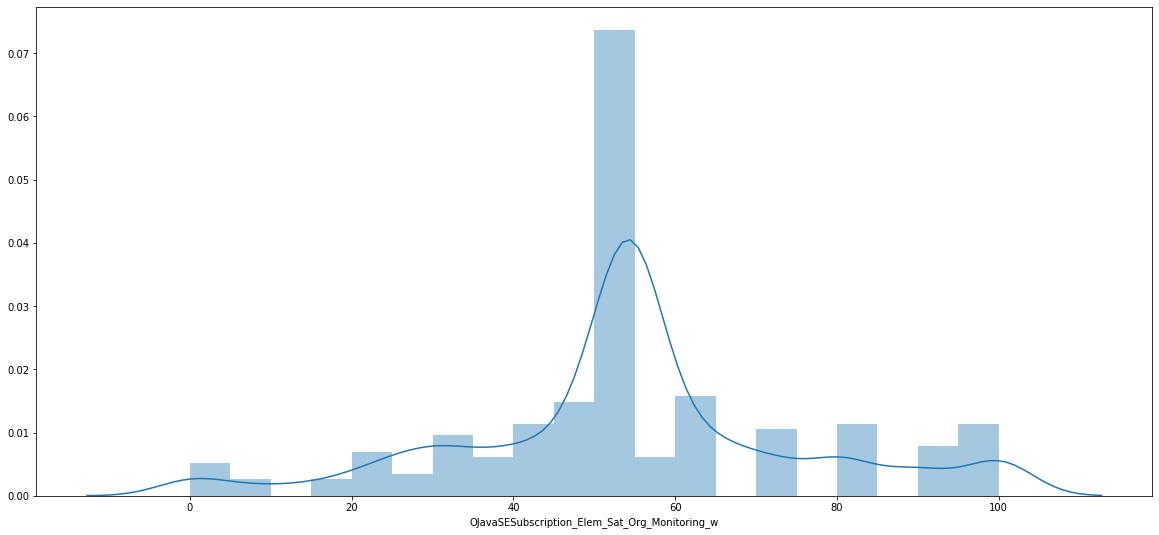

In [21]:
sns.distplot(senti_var.fillna(senti_var.mean()))

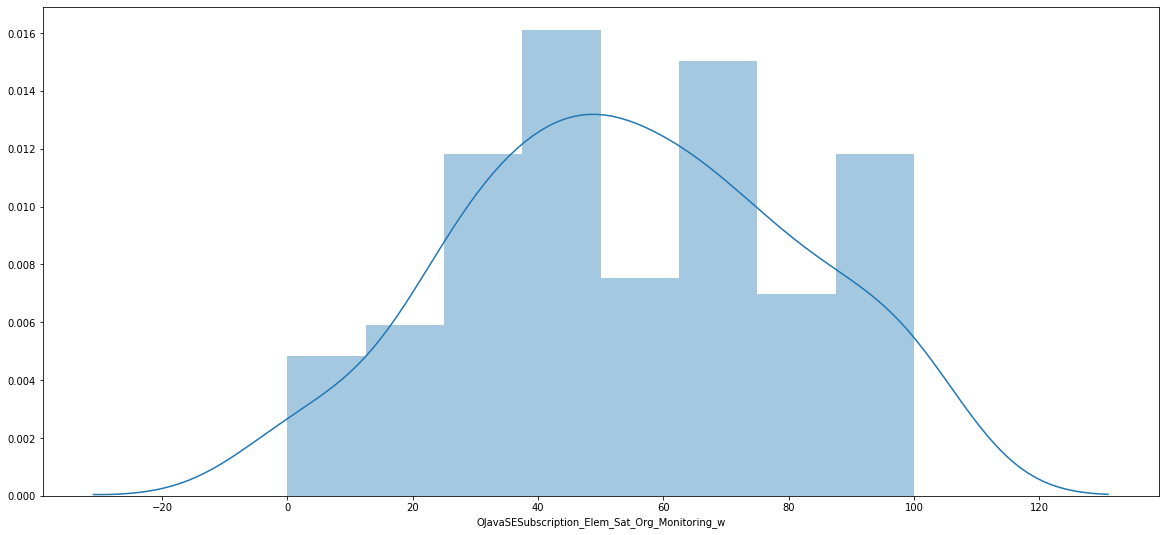

In [22]:
sns.distplot(senti_var.dropna())

# y_indw w/ Continuous Variables

In [49]:
y_list_list = [senti]
y_list_names = [modw_df[y_list].name for y_list in y_list_list]

i=0

X_drop = [('OJavaSESubscription_Elem_Sat_Org_Monitoring',
           'OJavaSESubscription_Elem_Imp_Org_Monitoring')]

X_list = cont_dummy_list

y_list = y_list_list[i]

# X_drop = X_drop
    
    
y_funct = None
print(y_list_names[i])

clf,MeanAbsoluteError, accuracy, y_na, varimp0, varimp1, varimp2, feature_importances, X_drop  = rf_pipe (
               mod_df = modw_df, 
               y_list = y_list, # list of response variables, if len()>1, these will be summed or meaned
               X_list = X_list,
               y_funct = y_funct, # either None, 'sum' or 'mean'. Must be one of non-None if len(y_list)>1
               X_drop = X_drop[i], # list of additional predictors to drop 
               imp_filename = '../data/output/temp.csv') #% (y_list_names[i],y_funct))

OJavaSESubscription_Elem_Sat_Org_Monitoring_w


In [50]:
accuracy

77.47751155156683

In [51]:
X_drop

['OJavaSESubscription_Elem_Sat_Org_Monitoring',
 'OJavaSESubscription_Elem_Imp_Org_Monitoring']

In [53]:
varimp_df = pd.DataFrame(feature_importances)
varimp_top10 = varimp_df[0].values[0:10]

varimp_df = varimp_df.merge(map_df, left_on=0,right_on='new')
varimp_df.columns = ['var','imp','var_2','Q']
varimp_df = varimp_df[['var','Q','imp']]
varimp_df[['Q','imp']][0:10]

,Q,imp
0,"Access to tools for automated updates and upgrade, desktop deployment rulesets and tools for Java version management Satisfaction (0-10)[ , ]",0.07
1,"Legacy Java application support Satisfaction (0-10)[ , ]",0.06
2,Please rate the importance of the following reasons driving your organization’s decision to purchase Oracle Java SE Subscription. Please rate each item on a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”. Ability to contribute to ongoing innovation of Java platform,0.06
3,"MOS (My Oracle Support) Satisfaction (0-10)[ , ]",0.05
4,"Access to tools for automated updates and upgrade, desktop deployment rulesets and tools for Java version management Importance (0-10)[ , ]",0.04
5,"Flexible licensing terms Satisfaction (0-10)[ , ]",0.04
6,"Quality of phone support Importance (0-10)[ , ]",0.04
7,"Patches and updates for older versions of Java Importance (0-10)[ , ]",0.03
8,"Patches and updates for older versions of Java Satisfaction (0-10)[ , ]",0.03
9,"Tools and updates for desktop management specifically using Java Web Start Satisfaction (0-10)[ , ]",0.03


In [63]:
X = modw_df.drop(y_list, axis=1, errors='ignore')
X = X[X_list]
X = X.drop(['OJavaSESubscription_Elem_Sat_Org_Monitoring',
           'OJavaSESubscription_Elem_Imp_Org_Monitoring'],
           axis=1, errors='ignore')
X = X.fillna(X.mean())
X_train, X_test = train_test_split(X, random_state=0)

In [64]:
varimp_top10 = varimp_df[['var']][0:10]['var'].tolist()
varimp_top10

['OJavaSESubscription_Elem_Sat_Org_AutoUpdateTools',
 'OJavaSESubscription_Elem_Sat_Org_LegacyJava',
 'OJavaSESubscription_OrgPurch_Imp_InnovationContribution',
 'OJavaSESubscription_Elem_Sat_Org_MyOSupport',
 'OJavaSESubscription_Elem_Imp_Org_AutoUpdateTools',
 'OJavaSESubscription_Elem_Sat_Org_FlexLicensing',
 'OJavaSESubscription_Attr_Imp_PhoneSupport',
 'OJavaSESubscription_Elem_Imp_Org_PatchesOlderV',
 'OJavaSESubscription_Elem_Sat_Org_PatchesOlderV',
 'OJavaSESubscription_Elem_Sat_Org_JavaWebStartUpdates']

In [65]:
tuple(varimp_top10[0:2])

('OJavaSESubscription_Elem_Sat_Org_AutoUpdateTools',
 'OJavaSESubscription_Elem_Sat_Org_LegacyJava')

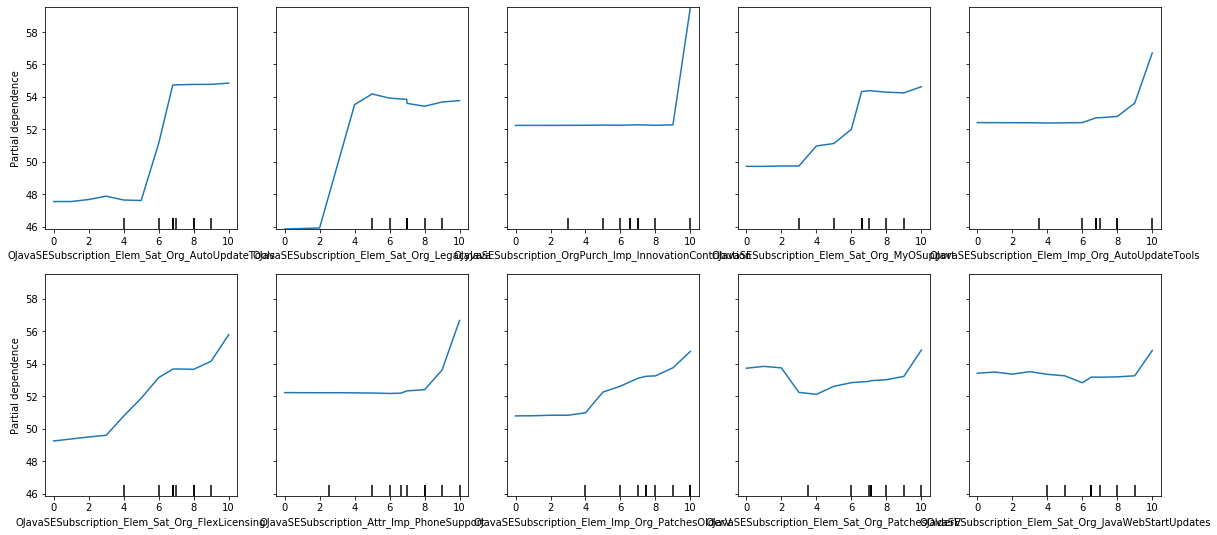

In [66]:
plot_partial_dependence(clf, X_train, varimp_top10, 
                        n_cols=5, grid_resolution=100)

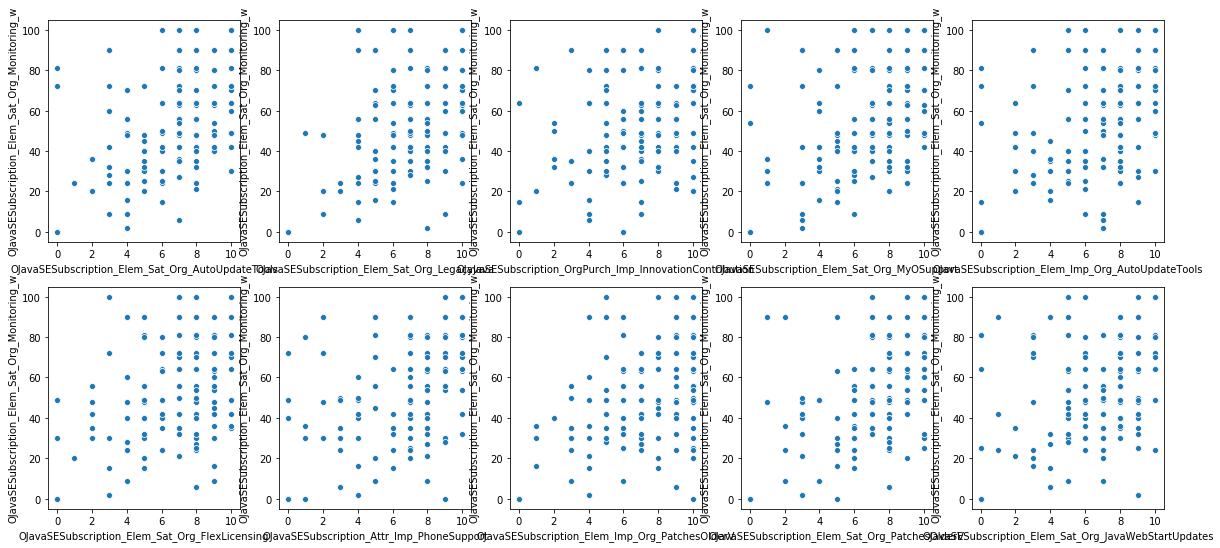

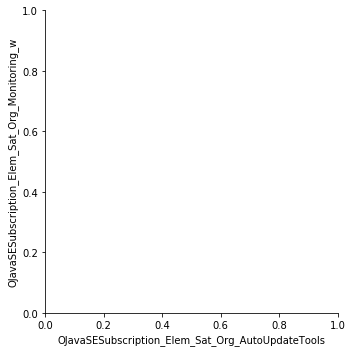

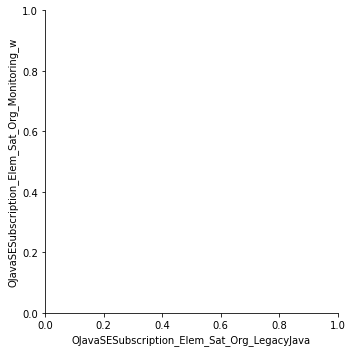

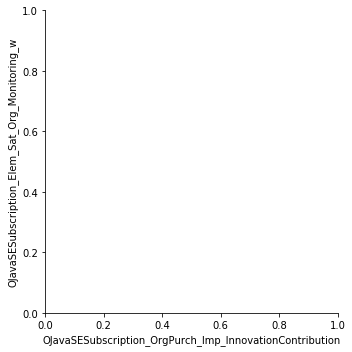

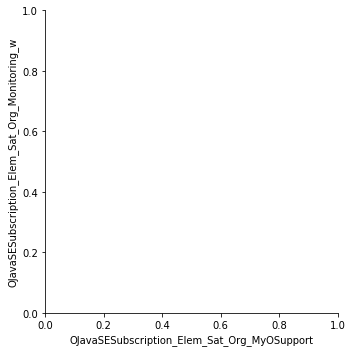

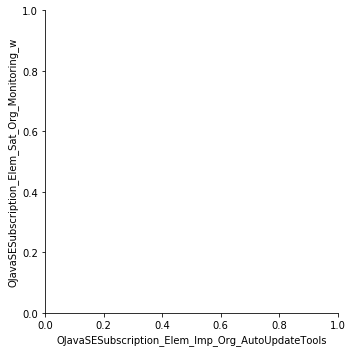

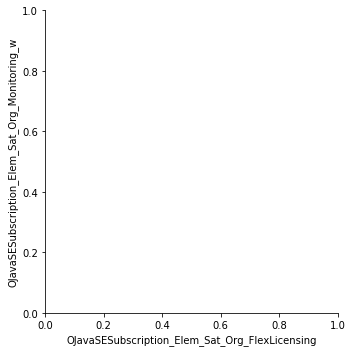

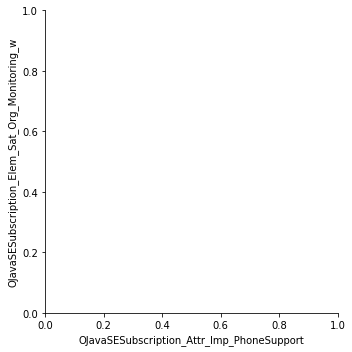

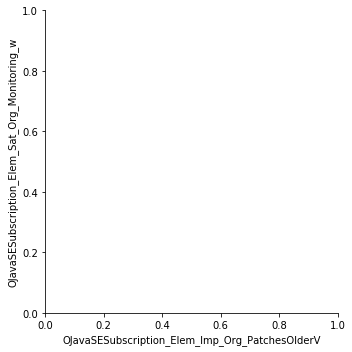

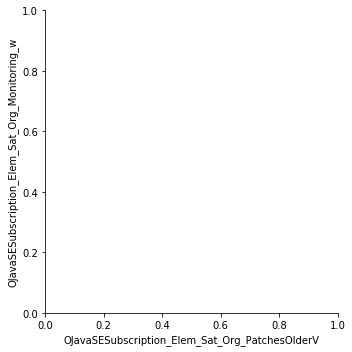

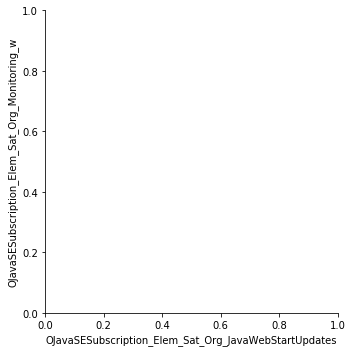

In [75]:
fig, axs = plt.subplots(ncols=5, nrows=2)
i=0
axli = axs.flatten()
for v in varimp_top10:
    sns.relplot(x=v, y=senti, data=modw_df, ax=axli[i])
    i=i+1

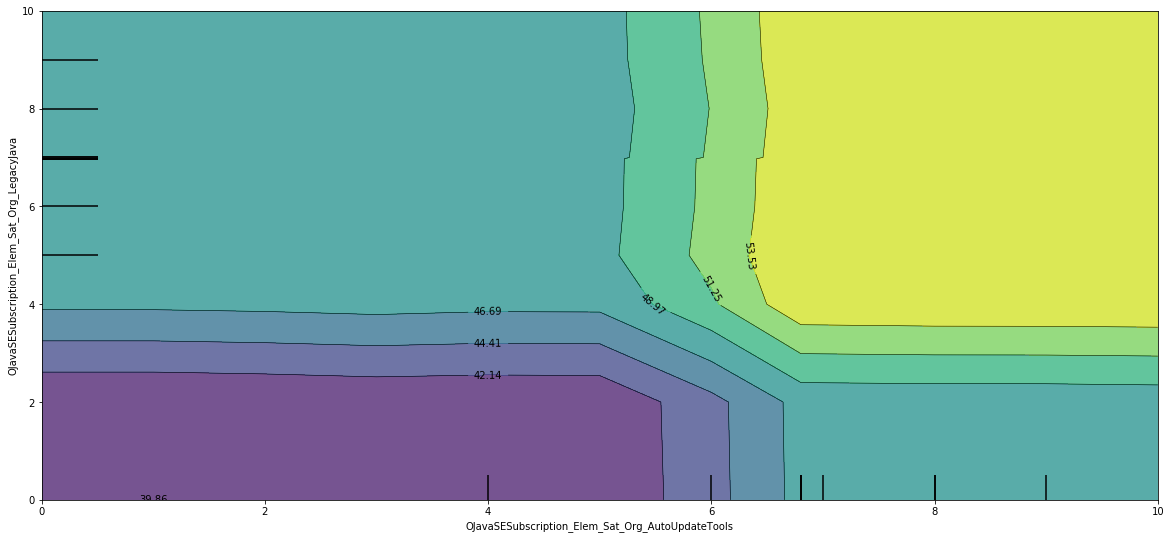

In [76]:
plot_partial_dependence(clf, X_train, [tuple(varimp_top10[0:2])])

In [77]:
# Examine each  driver... look for low use, low importance, low satisfation
print(varimp_top10)

['OJavaSESubscription_Elem_Sat_Org_AutoUpdateTools', 'OJavaSESubscription_Elem_Sat_Org_LegacyJava', 'OJavaSESubscription_OrgPurch_Imp_InnovationContribution', 'OJavaSESubscription_Elem_Sat_Org_MyOSupport', 'OJavaSESubscription_Elem_Imp_Org_AutoUpdateTools', 'OJavaSESubscription_Elem_Sat_Org_FlexLicensing', 'OJavaSESubscription_Attr_Imp_PhoneSupport', 'OJavaSESubscription_Elem_Imp_Org_PatchesOlderV', 'OJavaSESubscription_Elem_Sat_Org_PatchesOlderV', 'OJavaSESubscription_Elem_Sat_Org_JavaWebStartUpdates']


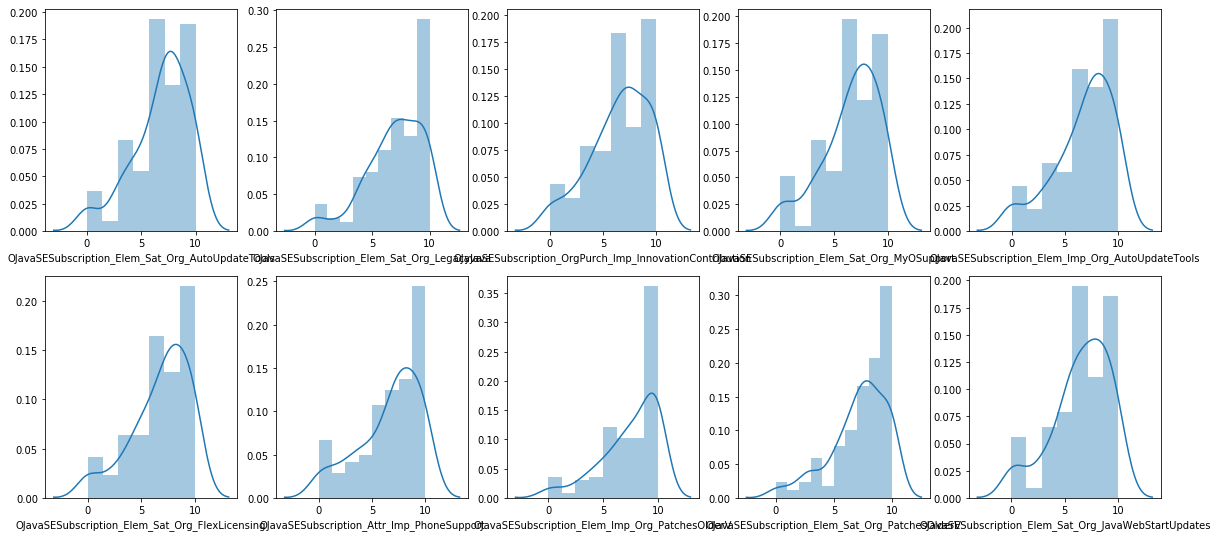

In [78]:
fig, axs = plt.subplots(ncols=5, nrows=2)
i=0
axli = axs.flatten()
for v in varimp_top10:
    sns.distplot(mod_df[v].dropna(), ax=axli[i])
    i=i+1

# y_indw w/ Categ Variables

In [79]:
y_list_list = [senti]
y_list_names = [modw_df[y_list].name for y_list in y_list_list]

i=0

X_drop = [('OJavaSESubscription_Elem_Sat_Org_Monitoring',
           'OJavaSESubscription_Elem_Imp_Org_Monitoring')]

X_list = catg_dummy_list+ dummy0_dummy_list

y_list = y_list_list[i]

# X_drop = X_drop
    
    
y_funct = None
print(y_list_names[i])

clf,MeanAbsoluteError, accuracy, y_na, varimp0, varimp1, varimp2, feature_importances, X_drop  = rf_pipe (
               mod_df = modw_df, 
               y_list = y_list, # list of response variables, if len()>1, these will be summed or meaned
               X_list = X_list,
               y_funct = y_funct, # either None, 'sum' or 'mean'. Must be one of non-None if len(y_list)>1
               X_drop = X_drop[i], # list of additional predictors to drop 
               imp_filename = '../data/output/temp.csv') #% (y_list_names[i],y_funct))

OJavaSESubscription_Elem_Sat_Org_Monitoring_w


In [80]:
accuracy

65.5551791515451

In [81]:
X_drop

['OJavaSESubscription_Elem_Sat_Org_Monitoring',
 'OJavaSESubscription_Elem_Imp_Org_Monitoring']

In [265]:
feature_importances

[('OJavaSESubscription_Alts_Top3_AppSecurity', 0.04),
 ('Country_Code_CA', 0.03),
 ('Country_Code_US', 0.03),
 ('Company_Industry_9', 0.03),
 ('Job_Title_2', 0.03),
 ('Job_Title_3', 0.03),
 ('Platform_Dev_Org_Primary_2', 0.03),
 ('Company_Industry_2', 0.02),
 ('Company_Industry_7', 0.02),
 ('Job_Title_8', 0.02),
 ('Company_Revenue_1', 0.02),
 ('Company_Revenue_2', 0.02),
 ('Java_App_Org_Deploy_2020_2', 0.02),
 ('Java_App_Org_Deploy_2020_3', 0.02),
 ('Java_App_Org_Deploy_2020_4', 0.02),
 ('OracleJavaSESubscription_Ind_Role_1', 0.02),
 ('OracleJavaSESubscription_Ind_Role_2', 0.02),
 ('OracleJavaSESubscription_Ind_Role_4', 0.02),
 ('Platform_Dev_Org_Primary_5', 0.02),
 ('Platform_Dev_Org_Primary_6', 0.02),
 ('Platform_Dev_Org_Primary_8', 0.02),
 ('JavaSESub_PrePurchasePeriod_1', 0.02),
 ('JavaSESub_PrePurchasePeriod_4', 0.02),
 ('JavaSESub_PrePurchasePeriod_5', 0.02),
 ('OJavaSESubscription_Alts_Top3_MaintenanceTools', 0.02),
 ('OJavaSESubscription_Alts_Top3_CostManagement', 0.02),
 ('OJa

In [ ]:
varimp_df = pd.DataFrame(feature_importances).sort_values(1,ascending=False)
varimp_top10 = varimp_df[0].values[0:10]

varimp_df = varimp_df.merge(map_df, left_on=0,right_on='new', how='left')
varimp_df.columns = ['var','imp','var_2','Q']
varimp_df['var3'] = ["_".join(t[:-1]) for t in varimp_df['var'].str.split('_')]
varimp_df['var4'] = [t[-1] for t in varimp_df['var'].str.split('_')]
varimp_df = varimp_df.merge(map_df, left_on='var3',right_on='new', how='left')
varimp_df.org = varimp_df.org + " " + varimp_df.var4
varimp_df['Q'] = varimp_df['Q'].fillna(varimp_df['org'])
varimp_df[['Q','imp']].sort_values('imp',ascending=False)[0:10]

In [161]:
X = modw_df.drop(y_list, axis=1, errors='ignore')
X = X[X_list]
X = X.drop(['OJavaSESubscription_Elem_Sat_Org_Monitoring',
           'OJavaSESubscription_Elem_Imp_Org_Monitoring'],
           axis=1, errors='ignore')
X = X.fillna(X.mean())
X_train, X_test = train_test_split(X, random_state=0)

In [165]:
varimp_top10 = varimp_df.sort_values('imp',ascending=False)[0:10]['var'].tolist()
varimp_top10

['OJavaSESubscription_Alts_Top3_AppSecurity',
 'Company_Industry_9',
 'Job_Title_2',
 'Job_Title_3',
 'Platform_Dev_Org_Primary_2',
 'Country_Code_CA',
 'Country_Code_US',
 'Company_Revenue_2',
 'Java_App_Org_Deploy_2020_2',
 'Company_Industry_2']

In [166]:
tuple(varimp_top10[0:2])

('OJavaSESubscription_Alts_Top3_AppSecurity', 'Company_Industry_9')

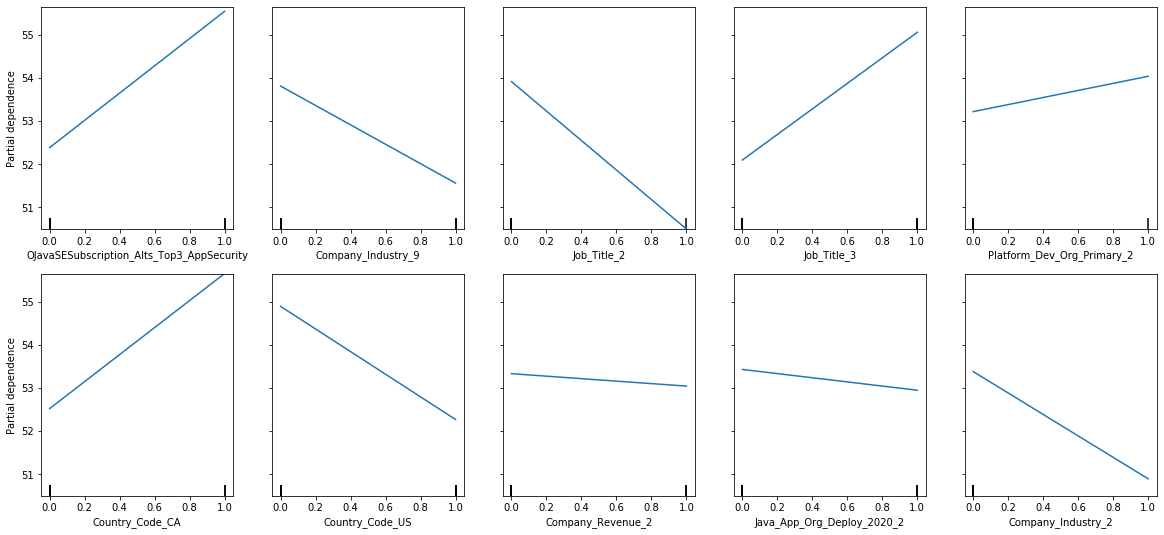

In [167]:
plot_partial_dependence(clf, X_train, varimp_top10, 
                        n_cols=5, grid_resolution=100)

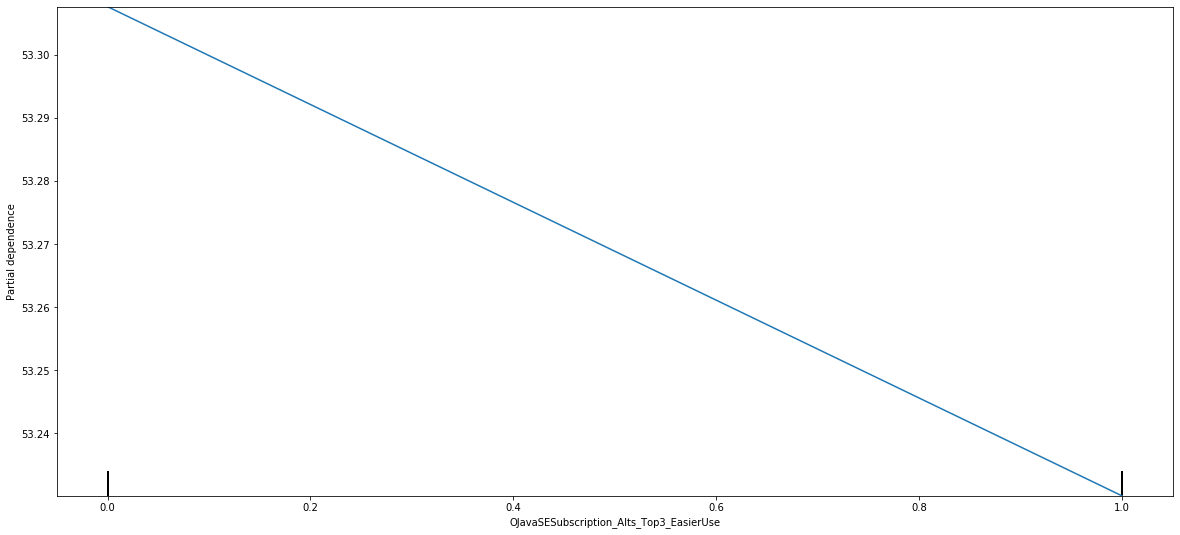

In [174]:
var = 'OJavaSESubscription_Alts_Top3_EasierUse'
plot_partial_dependence(clf, X_train, [var], 
                        n_cols=5, grid_resolution=100)

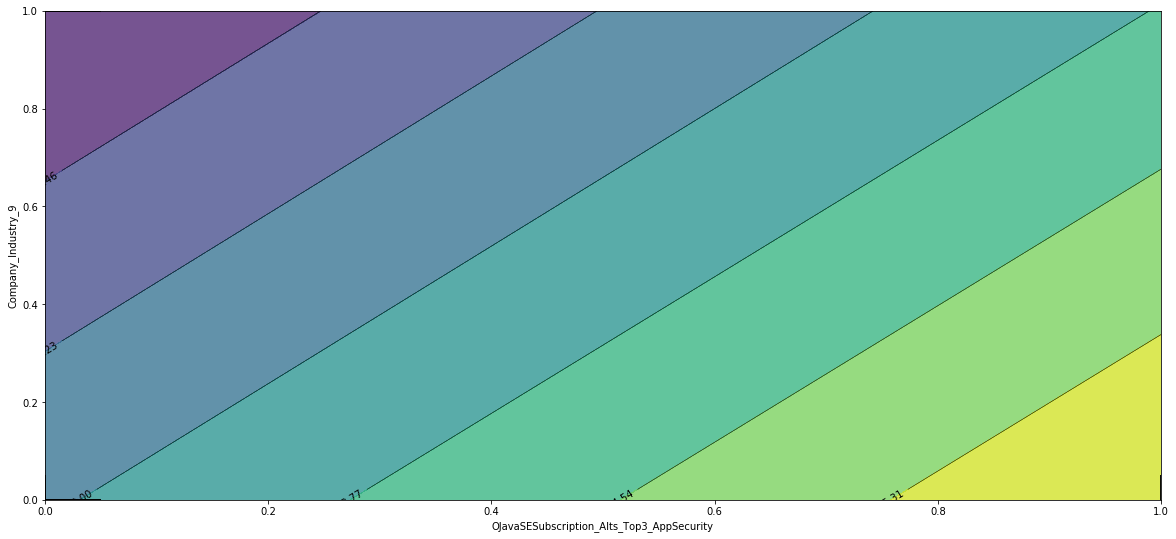

In [168]:
plot_partial_dependence(clf, X_train, [tuple(varimp_top10[0:2])])

In [169]:
# Examine each  driver... look for low use, low importance, low satisfation
print(varimp_top10)

['OJavaSESubscription_Alts_Top3_AppSecurity', 'Company_Industry_9', 'Job_Title_2', 'Job_Title_3', 'Platform_Dev_Org_Primary_2', 'Country_Code_CA', 'Country_Code_US', 'Company_Revenue_2', 'Java_App_Org_Deploy_2020_2', 'Company_Industry_2']


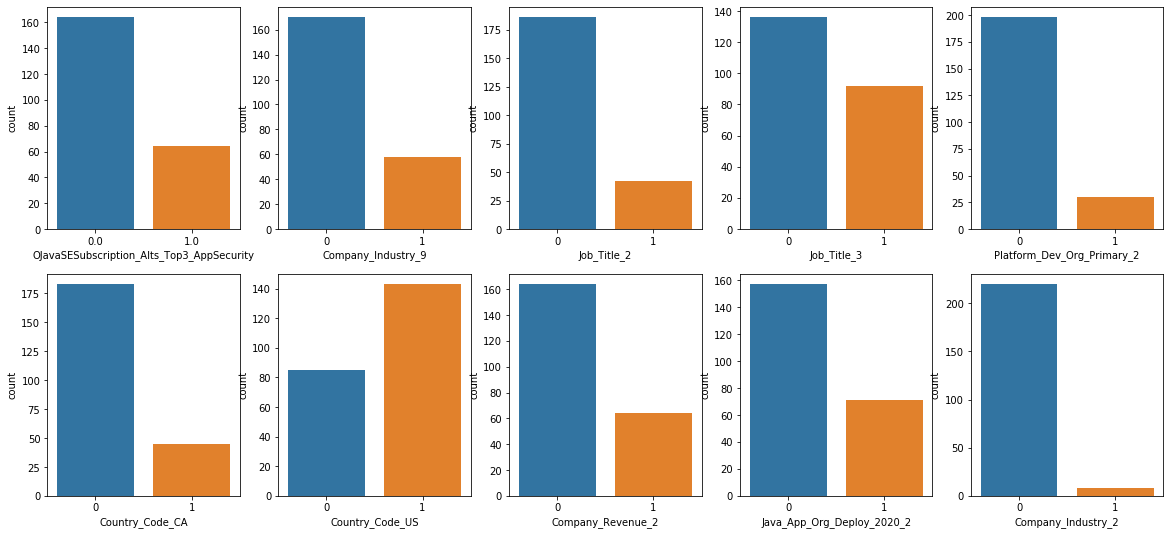

In [170]:
fig, axs = plt.subplots(ncols=5, nrows=2)
i=0
axli = axs.flatten()
for v in varimp_top10:
    sns.countplot(mod_df[v].dropna(), ax=axli[i])
    i=i+1

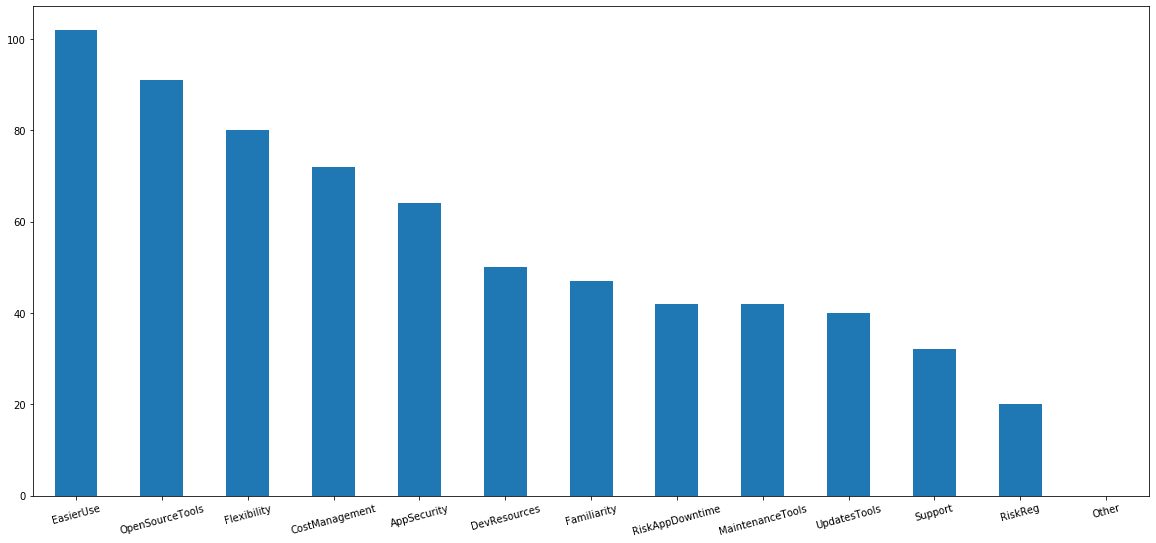

In [157]:
temp = modw_df.filter(regex='OJavaSESubscription_Alts_Top3_').sum().sort_values(ascending=False)
temp = temp.rename(lambda x: x.replace('OJavaSESubscription_Alts_Top3_',''))
temp.plot.bar(rot=15)

In [158]:
temp

EasierUse           102.0
OpenSourceTools      91.0
Flexibility          80.0
CostManagement       72.0
AppSecurity          64.0
DevResources         50.0
Familiarity          47.0
RiskAppDowntime      42.0
MaintenanceTools     42.0
UpdatesTools         40.0
Support              32.0
RiskReg              20.0
Other                 0.0
dtype: float64

In [175]:
modw_df.filter(regex='Country_Code').sum()

Country_Code         0.0
Country_Code_AU      1.0
Country_Code_CA     45.0
Country_Code_CZ      1.0
Country_Code_DE      9.0
Country_Code_DK      1.0
Country_Code_GB      5.0
Country_Code_IN     16.0
Country_Code_IT      1.0
Country_Code_NL      4.0
Country_Code_QA      1.0
Country_Code_US    143.0
Country_Code_VN      1.0
dtype: float64

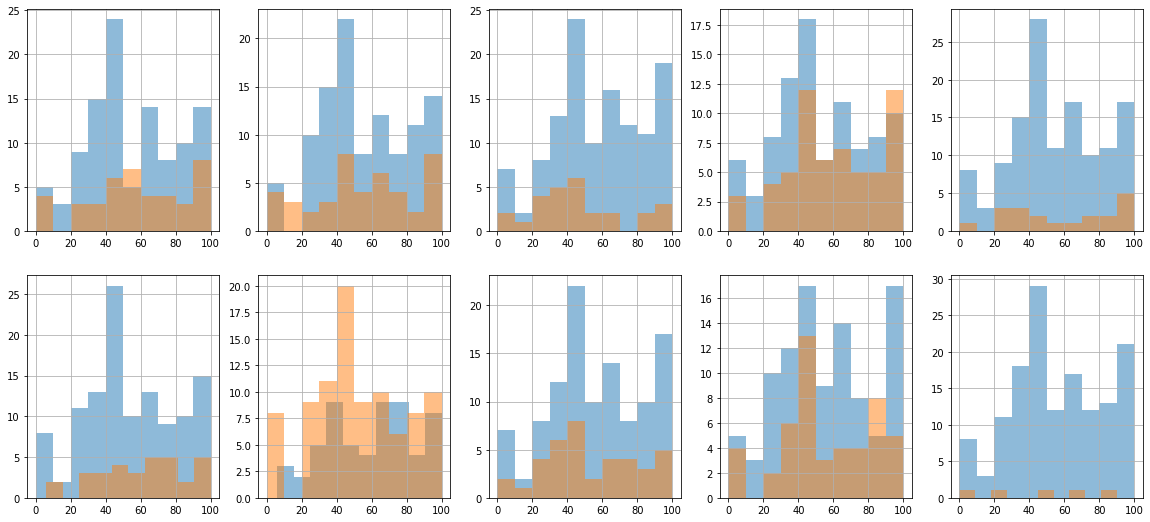

In [177]:
fig, axs = plt.subplots(ncols=5, nrows=2)
i=0
axli = axs.flatten()
for v in varimp_top10:
    modw_df.groupby(v)[senti].hist(ax=axli[i], alpha=.5)
    i=i+1


# METHODOLOGY

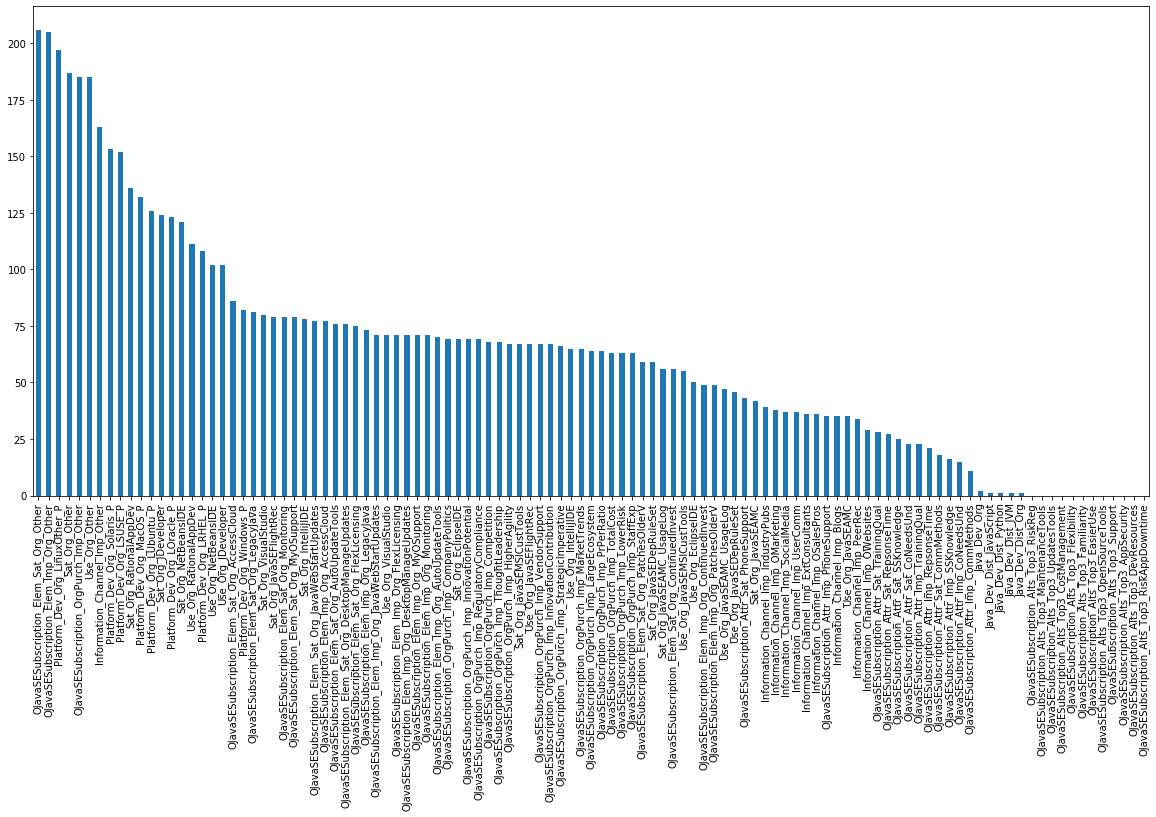

In [184]:
modw_df[cont_dummy_list+dummy0_dummy_list].isna().sum().sort_values(ascending=False).plot.bar()

In [186]:
X_test.shape

(57, 85)

In [187]:
X_train.shape

(171, 85)

In [199]:
from matplotlib import cm
cmap = cm.get_cmap('tab10')

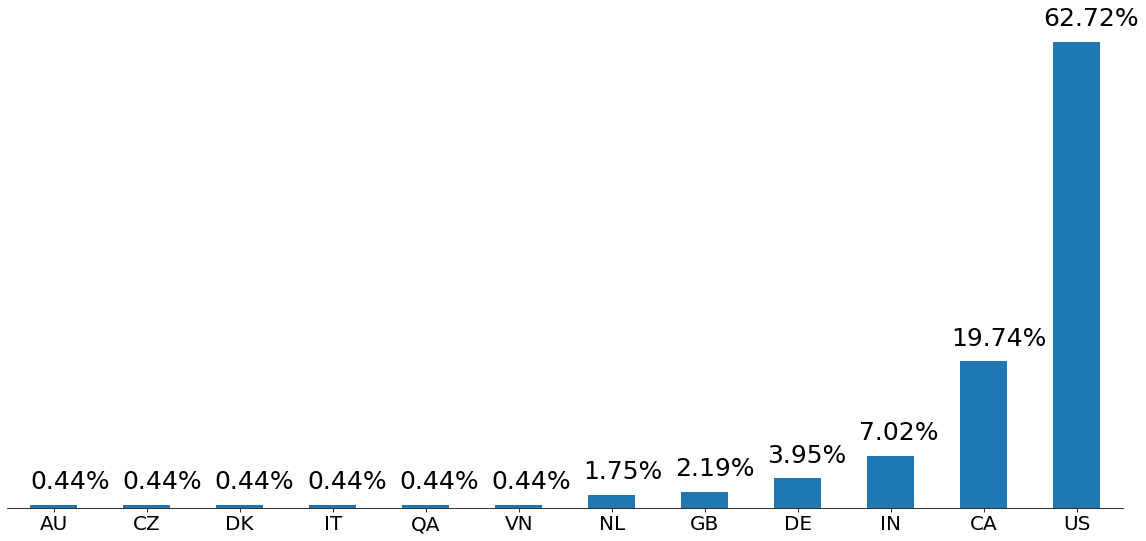

In [259]:
temp = modw_df.filter(regex='Country').sum().sort_values(ascending=True)
temp = temp.rename(lambda x: x.replace('Country_Code_',''))

ax = temp[2:,].plot.bar(rot=0, fontsize = 20)
for p in ax.patches:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_yticks([])
    ax.annotate(str(
        (round(
            p.get_height()/228*100,2)))+"%", 
                (p.get_x()*.99, p.get_height()+5),
               size=25)

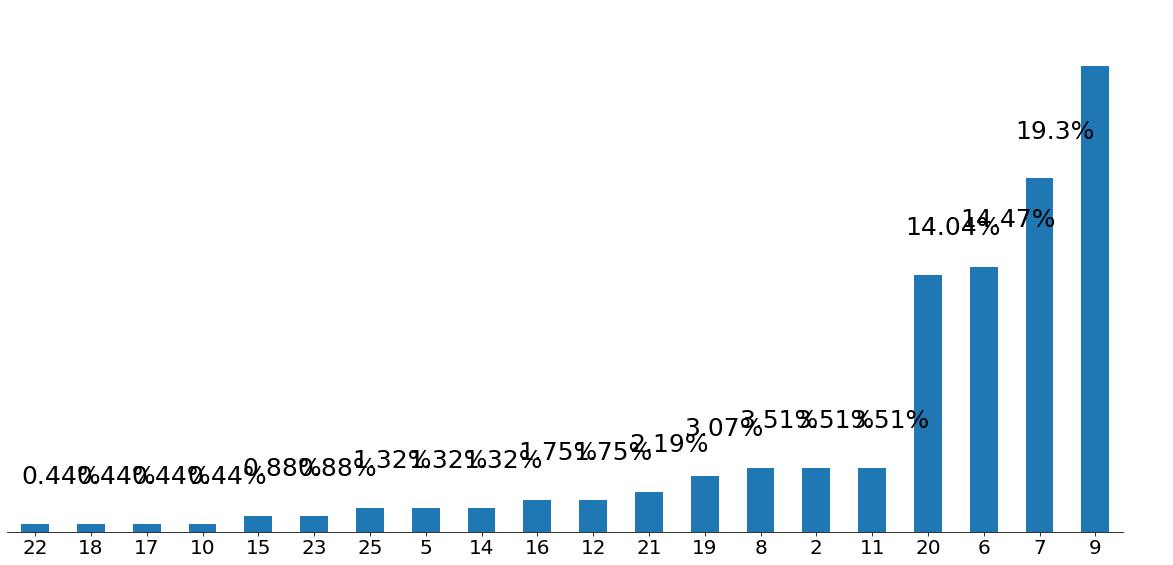

In [264]:
temp = modw_df.filter(regex='Industry').sum().sort_values(ascending=True)
temp = temp.rename(lambda x: x.replace('Company_Industry_',''))

ax = temp[1:-2,].plot.bar(rot=0, fontsize = 20)
for p in ax.patches:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_yticks([])
    ax.annotate(str(
        (round(
            p.get_height()/228*100,2)))+"%", 
                (p.get_x()*.99, p.get_height()+5),
               size=25)

In [262]:
temp

Company_Industry_Other]                    0.0
Company_Industry_22                        1.0
Company_Industry_18                        1.0
Company_Industry_17                        1.0
Company_Industry_10                        1.0
Company_Industry_15                        2.0
Company_Industry_23                        2.0
Company_Industry_25                        3.0
Company_Industry_5                         3.0
Company_Industry_14                        3.0
Company_Industry_16                        4.0
Company_Industry_12                        4.0
Company_Industry_21                        5.0
Company_Industry_19                        7.0
Company_Industry_8                         8.0
Company_Industry_2                         8.0
Company_Industry_11                        8.0
Company_Industry_20                       32.0
Company_Industry_6                        33.0
Company_Industry_7                        44.0
Company_Industry_9                        58.0
Information_C

In [268]:
temp = modw_df.filter(regex='Information_Channel_Imp_')#.sum().sort_values(ascending=True)
temp = temp.rename(lambda x: x.replace('Information_Channel_Imp_',''))

ax = temp[1:-2,].plot.bar(rot=0, fontsize = 20)
for p in ax.patches:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_yticks([])
    ax.annotate(str(
        (round(
            p.get_height()/228*100,2)))+"%", 
                (p.get_x()*.99, p.get_height()+5),
               size=25)

AttributeError: 'int' object has no attribute 'replace'

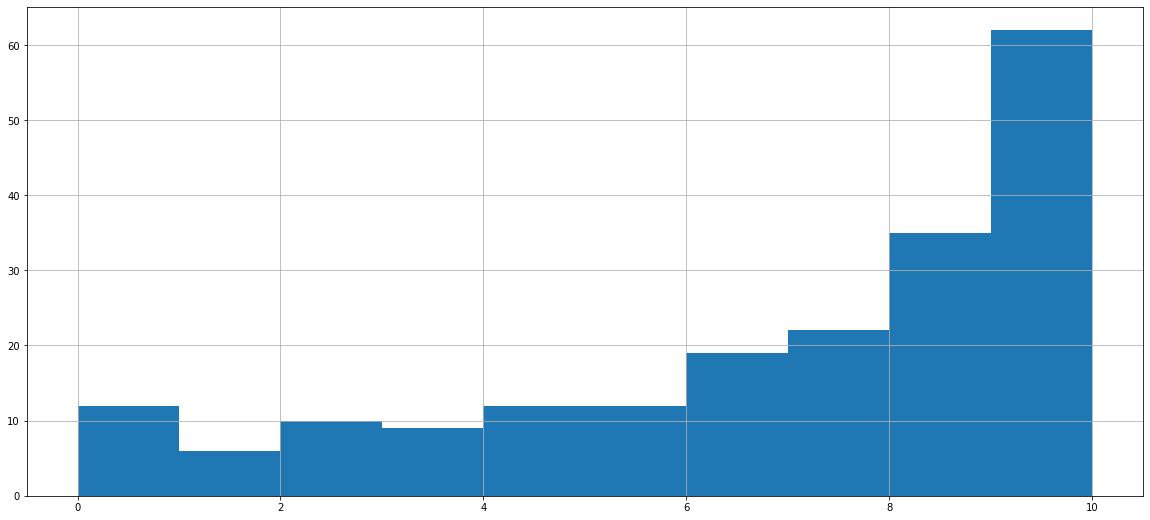

In [292]:
modw_df['Information_Channel_Imp_OWebsites'].hist()

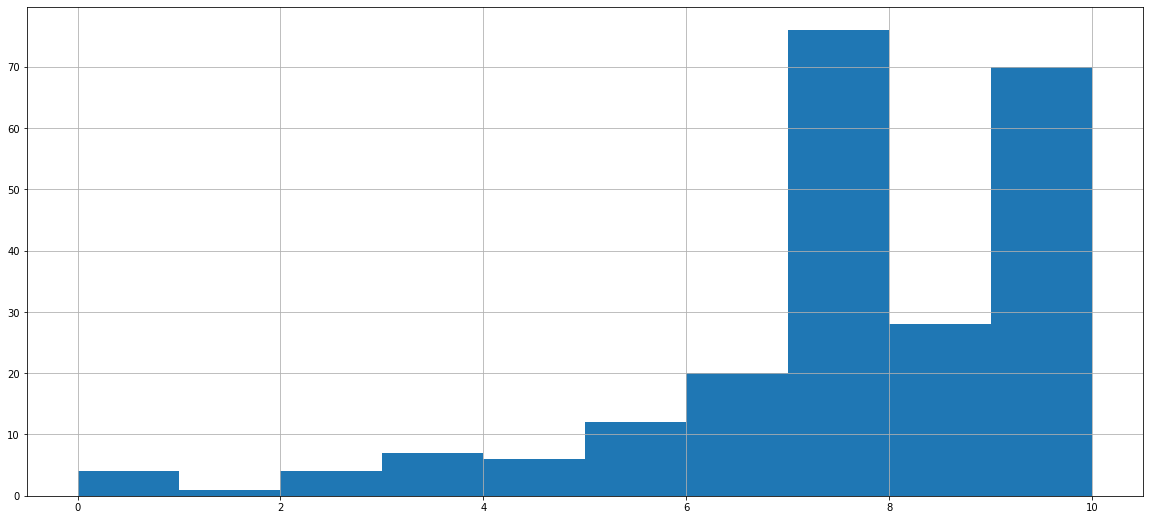

In [295]:
modw_df['OJavaSESubscription_Elem_Sat_Org_ContinuedInvest'].fillna(
    modw_df['OJavaSESubscription_Elem_Sat_Org_ContinuedInvest'].mean()).hist()

In [276]:
temp.mean(skipna=True)

Information_Channel_Imp_OWebsites         6.572864
Information_Channel_Imp_OSalesPros        4.588542
Information_Channel_Imp_OMarketing        4.968421
Information_Channel_Imp_Blogs             5.347150
Information_Channel_Imp_ExtConsultants    4.656250
Information_Channel_Imp_SocialMedia       4.837696
Information_Channel_Imp_UserComm          6.623037
Information_Channel_Imp_IndustryPubs      5.994709
Information_Channel_Imp_PeerRec           6.943299
Information_Channel_Imp_Other             2.938462
Information_Channel_Imp_Other_Comment     5.600000
dtype: float64

In [277]:
temp.count()

Information_Channel_Imp_OWebsites         199
Information_Channel_Imp_OSalesPros        192
Information_Channel_Imp_OMarketing        190
Information_Channel_Imp_Blogs             193
Information_Channel_Imp_ExtConsultants    192
Information_Channel_Imp_SocialMedia       191
Information_Channel_Imp_UserComm          191
Information_Channel_Imp_IndustryPubs      189
Information_Channel_Imp_PeerRec           194
Information_Channel_Imp_Other              65
Information_Channel_Imp_Other_Comment       5
dtype: int64